# Análisis de Estacionariedad
En esta etapa, se realiza el análisis de estacionariedad en la serie temporal del dataset [Beijing Multi-Site Air-Quality Data Set][kaggle] de Kaggle.

[kaggle]: https://www.kaggle.com/datasets/sid321axn/beijing-multisite-airquality-data-set

### **Objetivos**

1. Visualización de la Serie Temporal
2. Descomposición de la Serie Temporal
3. Prueba de Dickey-Fuller Aumentada (ADF)
4. Interpretación de Resultados

Este análisis es clave para comprender la naturaleza de la serie temporal y preparar los datos para la fase de modelado en etapa siguiente.

In [7]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

### Importación de Librerías

In [2]:
df = pd.read_csv("../data/dataset_clean.csv")

### Crear la columna 'datetime' combinando las columnas 'year', 'month', 'day', y 'hour'


In [3]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

### Serie Temporal PM2.5

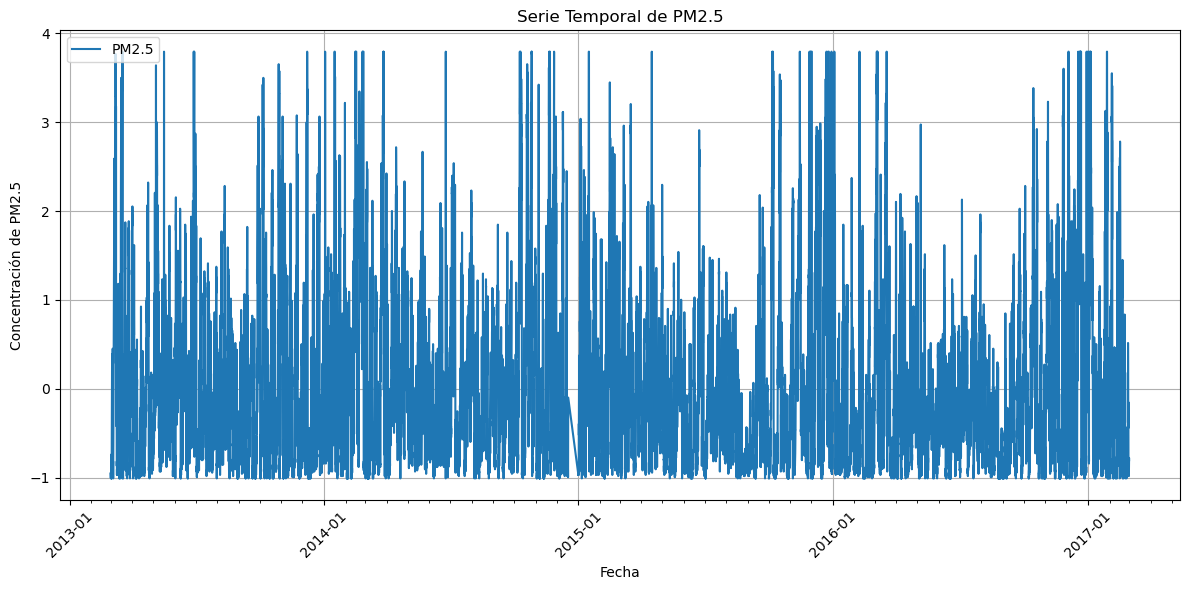

In [4]:
# Verificar que 'datetime' es el índice
df.set_index('datetime', inplace=True)

# Visualizar la serie temporal de PM2.5 con fechas en el eje X
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PM2.5'], label='PM2.5')
plt.title('Serie Temporal de PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración de PM2.5')
plt.legend()

# Formatear el eje X para mostrar fechas
plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Marcas principales cada año
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de año-mes
plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Marcas menores cada mes

plt.xticks(rotation=45)  
plt.grid(visible=True)
plt.tight_layout()
plt.show()

### Descomposición de la Serie Temporal de PM2.5

Se realizará la descomposición de la señal original en sus componentes principales, lo que facilita el análisis de patrones específicos dentro de la serie. En este caso, hemos aplicado una descomposición aditiva a la concentración de PM2.5 en Beijing para observar:

1. **Observado**: La serie temporal original de PM2.5, que muestra las variaciones de concentración a lo largo del tiempo.
2. **Tendencia**: Una representación de la tendencia subyacente en los datos, que puede indicar aumentos o disminuciones generales de PM2.5 a lo largo del tiempo.
3. **Estacionalidad**: Componentes estacionales que muestran patrones repetitivos a intervalos regulares, los cuales podrían estar asociados a factores anuales o estacionales.
4. **Residuo**: La parte de la serie que no es explicada por la tendencia ni la estacionalidad, representando el ruido o variabilidad aleatoria en los datos.

Esta descomposición es útil para identificar y aislar componentes específicos que pueden influir en la concentración de PM2.5, permitiendo un análisis detallado y facilitando futuros modelos de predicción que consideren tanto la tendencia como la estacionalidad en la serie.


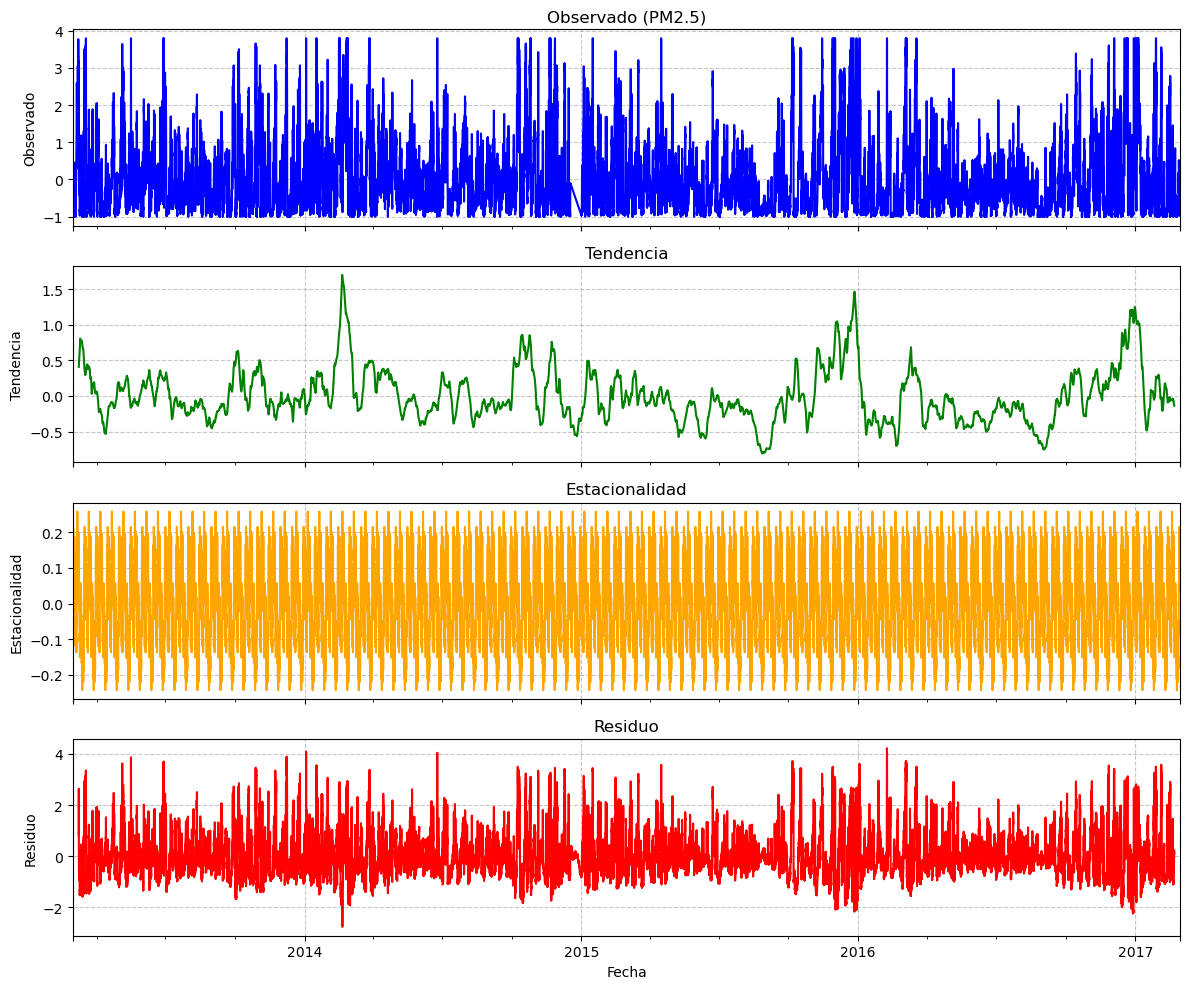

In [6]:
# Descomposición de la serie temporal
decomposition = seasonal_decompose(df['PM2.5'], model='additive', period=365)

# Configuración del gráfico
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)

# Títulos y etiquetas personalizadas para cada componente
decomposition.observed.plot(ax=axes[0], color='blue', title='Observado (PM2.5)')
axes[0].set_ylabel('Observado')

decomposition.trend.plot(ax=axes[1], color='green', title='Tendencia')
axes[1].set_ylabel('Tendencia')

decomposition.seasonal.plot(ax=axes[2], color='orange', title='Estacionalidad')
axes[2].set_ylabel('Estacionalidad')

decomposition.resid.plot(ax=axes[3], color='red', title='Residuo')
axes[3].set_ylabel('Residuo')
axes[3].set_xlabel('Fecha')

# Ajustes de estilo
for ax in axes:
    ax.grid(visible=True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### Prueba de Dickey-Fuller Aumentada (ADF)

La prueba ADF evalúa la hipótesis nula de que la serie no es estacionaria. Si el valor p es menor a 0.05, se rechaza la hipótesis nula y se concluye que la serie es estacionaria.

In [11]:
# Realizar la prueba ADF en la serie PM2.5
result = adfuller(df['PM2.5'].dropna())  
print("Estadístico ADF:", result[0])
print("Valor p:", result[1])
print("Valores críticos:", result[4])



Estadístico ADF: -19.421072035506974
Valor p: 0.0
Valores críticos: {'1%': -3.43053678680168, '5%': -2.861622555151452, '10%': -2.5668139415123283}


### Resultados

**Estadístico ADF:** El valor obtenido del estadístico ADF es -19.42. Este valor es considerablemente menor que los valores críticos proporcionados al 1%, 5%, y 10% (es decir, -3.4305, -2.8616, y -2.5668, respectivamente). Esto significa que la estadística ADF es más negativa que cualquiera de los valores críticos, lo cual es un indicio fuerte de estacionariedad.

**Valor p:** El valor p obtenido es 0.0, que es significativamente menor que el nivel de significancia común de 0.05 (o incluso 0.01). Esto implica que podemos rechazar la hipótesis nula con un alto nivel de confianza.

### Conclusión

La hipótesis nula de la prueba de Dickey-Fuller establece que la serie tiene una raíz unitaria, es decir, que no es estacionaria.
Dado el valor p tan bajo y que el estadístico ADF es menor que los valores críticos en todos los niveles de significancia, rechazamos la hipótesis nula.
Esto indica que la serie temporal de PM2.5 es estacionaria, lo cual significa que sus propiedades estadísticas (como la media y la varianza) se mantienen constantes en el tiempo.